# 필요 라이브러리들

## 버전 확인

In [1]:
import sys
print("Python 버전 :", sys.version)
import sklearn
print("sclearn 버전 :", sklearn.__version__)

Python 버전 : 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
sclearn 버전 : 0.23.2


## numpy

In [2]:
import numpy as np

x= np.linspace(-10,10,100)
y= np.sin(x)

## matplotlib

<IPython.core.display.Javascript object>


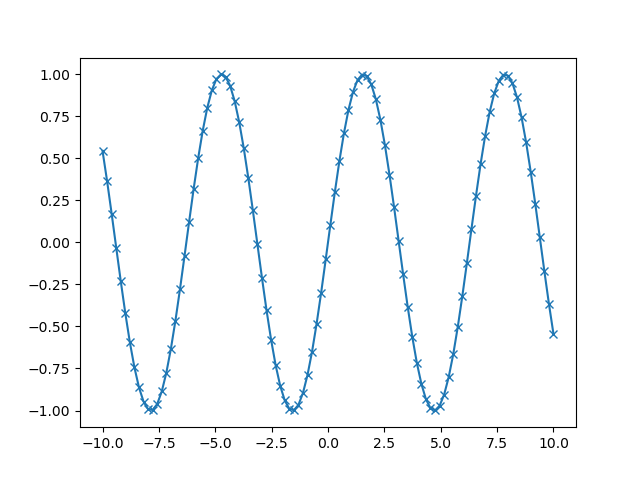

In [3]:
%matplotlib notebook
import matplotlib.pylab as plt

plt.plot(x,y, marker='x')

## pandas

In [4]:
import pandas as pd

data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]}

data_pandas = pd.DataFrame(data)
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


# 기본 Workflow

## 데이터 적재

In [5]:
from sklearn.datasets import load_iris  # iris data 로드하는 함수
iris_dataset = load_iris()               # Bunch class로 dictionary와 비슷하지만 값을[key]대신 .key로 불러올수잇음

print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


* DataFrame으로 데이터를 받고싶은 경우

In [6]:
iris_dataset_df = load_iris(as_frame=True)
display(iris_dataset_df['frame'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
print(iris_dataset['DESCR'][:200])        # 데이터 설명글

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive


In [8]:
print(iris_dataset['target_names'])      # 분류할 클래스 이름

['setosa' 'versicolor' 'virginica']


In [9]:
print(iris_dataset['feature_names'])      # 데이터 특성 이름

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
print(iris_dataset['data'][:5])           # 실제 데이터 (2darray)
iris_dataset['data'].shape

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


(150, 4)

In [11]:
print(iris_dataset['target'])           # 레이블 값 (1darray)
iris_dataset['target'].shape

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


(150,)

## 훈련세트와 테스트세트 분할

In [12]:
# train : test 는 default로 75 : 25  (test_size로 변경 가능)

from sklearn.model_selection import train_test_split
X, y = iris_dataset['data'], iris_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

print("X_train 크기 :", X_train.shape)
print("y_train 크기 :", y_train.shape)
print("X_test 크기 :", X_test.shape)
print("y_test 크기 :", y_test.shape)

X_train 크기 : (112, 4)
y_train 크기 : (112,)
X_test 크기 : (38, 4)
y_test 크기 : (38,)


## 데이터 살펴보기

<IPython.core.display.Javascript object>


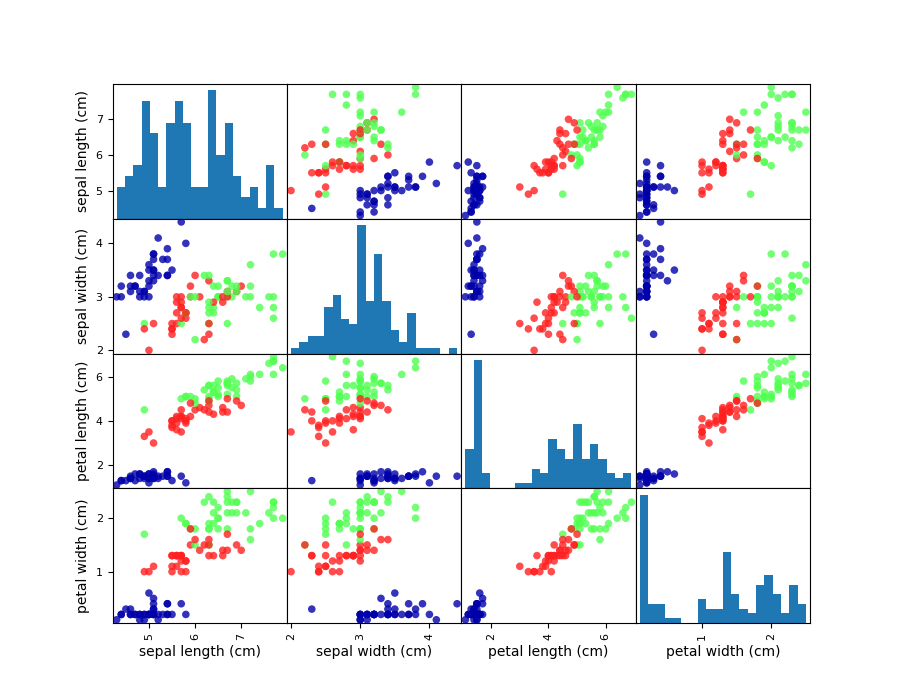

In [13]:
from ml1 import mglearn
# scatter matrix

iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize =(9,7), marker='o', s= 30, alpha=0.8,
                           hist_kwds={'bins':20}, cmap = mglearn.cm3)
plt.show()

## 모델 학습

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)             # KNN 모델 생성
knn.fit(X_train,y_train)                              # 학습시키기

KNeighborsClassifier(n_neighbors=1)

## 예측

In [15]:
print('예측 값 :',prediction := knn.predict([[5, 2.9, 1, 0.2]]))        # 2d array 이여야 함
print('예측 이름:', iris_dataset.target_names[prediction])

예측 값 : [0]
예측 이름: ['setosa']


## 모델 평가

In [16]:
y_predict = knn.predict(X_test)
print('테스트 세트 예측값 :',y_predict)

accuracy= np.mean(y_predict == y_test)
print(f'테스트 세트의 정확도 : {accuracy:.2f}')

테스트 세트 예측값 : [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
테스트 세트의 정확도 : 0.97
